# 相关库导入

In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import torch.utils.data as Data
import torch.optim as optim
import seaborn as sns
from torch import functional as F

# 将图片分为睁闭眼两类

In [6]:
#用于获取文件夹中的文件对象、创建文件夹
import shutil
#移动文件到指定文件夹中
import os
for i in range(1,38):
    if (i<=9):
        path = r"D:\myData\mrlEyes_2018_01\s000{}".format(i)
    else:
        path = r"D:\myData\mrlEyes_2018_01\s00{}".format(i)
    files_list = os.listdir(path)
    for file in files_list:
        #分离文件名和扩展名
        filename, suffix = os.path.splitext(file)
        data = filename.split('_')[4]
        file = '{}\{}'.format(path,file)
        #移动文件到指定文件夹
        if (data == '0'):
            folder_name = r"D:\myData\mrlEyes_2018_01\close"
            shutil.move(file, folder_name)
        elif(data == '1'):
            folder_name = r"D:\myData\mrlEyes_2018_01\open"
            shutil.move(file, folder_name)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'D:\\myData\\mrlEyes_2018_01\\s0001'

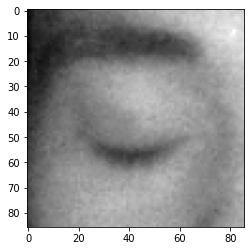

In [3]:
Datadirectory = r"D:\myData\Eyes_tiny"
Classes = ["Closed_Eyes", "Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

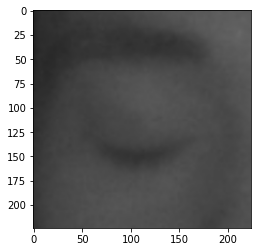

In [4]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [8]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_Data()

In [9]:
X = []
Y = []
for features,label in training_Data:
    X.append(features)
    Y.append(label)
X = np.array(X).reshape(-1,3,img_size, img_size)
Y = np.array(Y)
X = torch.tensor(X,dtype=torch.float)
Y = torch.tensor(Y,dtype=torch.float)

In [13]:
new_model.eval()

MobileNet(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 128, kernel_size=(1, 1),

# TensorFlow版本

In [21]:
# model = tf.keras.applications.mobilenet.MobileNet()
# base_input = model.layers[0].input ##input
# base_output = model.layers[-4].output
# Flat_layers = layers.Flatten()(base_output)
# final_output = layers.Dense(1)(Flat_layers)
# final_output = layers.Activation('sigmoid')(final_output)
# new_model = keras.Model(inputs = base_input, outputs = final_output)
# new_model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
# new_model.fit(X,Y, epochs = 5, validation_split = 0.2) ##training
# new_model.save('my_model.h5')

In [54]:
#查看TensorFlow模型
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

# pytorch版本

In [5]:
import time 
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torchvision.models as models
from torch.autograd import Variable

class MobileNet(nn.Module):
    def __init__(self):
        super(MobileNet,self).__init__()
        
        #标准卷积
        def conv_bn(inp,oup,stride):
            return nn.Sequential(
                    nn.Conv2d(inp,oup,3,stride,1,bias = False), #padding=1，对应ZeroPadding
                    nn.BatchNorm2d(oup),
                    nn.ReLU(inplace = True))
        
        #深度卷积(对应conv_dw)
        def conv_dw(inp,oup,stride):
            return nn.Sequential(
                    nn.Conv2d(inp,inp,3,stride,1,groups = inp,bias = False),
                    nn.BatchNorm2d(inp),
                    nn.ReLU(inplace = True),
                    
        #1×1标准卷积(对应conv_pw)
                    nn.Conv2d(inp,oup,1,1,0,bias = False),
                    nn.BatchNorm2d(oup),
                    nn.ReLU(inplace = True))
            
        #按照TensorFlow写出对应的pytorch序列模型
        self.model = nn.Sequential(
                conv_bn(3,32,2),
                conv_dw(32,64,1),
                conv_dw(64,128,2),
                conv_dw(128,128,1),
                conv_dw(128,256,2),
                conv_dw(256,256,1),
                conv_dw(256,512,2),
                conv_dw(512,512,1),
                conv_dw(512,512,1),
                conv_dw(512,512,1),
                conv_dw(512,512,1),
                conv_dw(512,512,1),
                conv_dw(512,1024,2),
                conv_dw(1024,1024,1),
                nn.AvgPool2d(7),)
        #全连接层和激活函数，fc对应Dense
        self.fc = nn.Linear(1024,1)
        self.dropout = nn.Dropout()
        self.flatten = nn.Flatten()
        self.softmax = nn.Softmax()
        self.sigmoid = nn.Sigmoid()
    
    #网络的前向过程    
    def forward(self,x):
        x = self.model(x)
        x = x.view(-1,1024)
        x = self.dropout(x)
        x = self.flatten(x)
        x = self.sigmoid(self.fc(x))
        x = x.squeeze(-1)
        return x

# 模型训练

In [6]:
def train_model(model,train_loader):
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for i,data in enumerate(train_loader):
        inputs,labels = data
        predictions = model(inputs)
        predictions = predictions.reshape(-1,1)
        loss = loss_func(predictions,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*labels.size()[0]
        final_pred = (predictions>=0.5).reshape(-1)
        l = torch.ones(final_pred.shape)
        pred = l*final_pred
        labels = labels.reshape(-1)
        num_correct = (pred==labels).sum()
        running_acc += num_correct.item()
    return running_loss,running_acc

def loss_curve(list_loss,list_acc):
    epochs = np.arange(1,len(list_loss)+1) 
    fig,ax = plt.subplots()
    ax.plot(epochs,list_loss,label='loss')
    ax.plot(epochs,list_acc,label='accuracy')
    ax.set_xlabel('epoch')
    ax.set_ylabel('%')
    ax.set_title('loss & accuray ')
    ax.legend()

In [12]:
#查看pytorch模型
new_model.__dict__

{'training': False,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict([('model',
               Sequential(
                 (0): Sequential(
                   (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
                   (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                   (2): ReLU(inplace=True)
                 )
                 (1): Sequential(
                   (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
                   (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [13]:
# 读入数据
class MyData(Data.Dataset):
    def __init__(self, feature, label):
        self.feature = feature # 特征
        self.label = label # 标签

    def __len__(self):
        return len(self.feature)

    def __getitem__(self, idx):
        return self.feature[idx], self.label[idx]

def load_data(batch_size):
    # 读取数据
    train_images = torch.tensor(X,dtype=torch.float)
    train_labels = torch.tensor(Y,dtype=torch.float)
    train_labels = train_labels.reshape(-1,1)
    # 构建pytorch数据类
    train_data = MyData(train_images,train_labels)
    # 构建pytorch数据集Dataloader
    train_loader = Data.DataLoader(dataset = train_data,batch_size=batch_size,shuffle=True)
    return train_data,train_loader

In [11]:
# 调用定义的加载函数进行数据加载
batch_size = 64
# 循环50个epoch进行数据训练
epochs = 50
train_data,train_loader = load_data(batch_size)

# 定义模型、loss function 
new_model= MobileNet()
loss_func = nn.BCELoss()
optimizer = optim.Adam(new_model.parameters(),lr=0.0001,weight_decay=1e-6)

list_loss,list_acc = [],[] 
for epoch in range(1,epochs+1):
    if (epoch%10==0):
        torch.save(new_model,'my_net{}.pth'.format(epoch//10)) #防止数据丢失，每训练10个epoch保存一次模型
    running_loss,running_acc=train_model(new_model,train_loader)
    list_loss.append(running_loss/train_data.__len__())
    list_acc.append(running_acc/train_data.__len__())
    print('Train {} epoch, Loss: {:.4f}, Acc:{:.2f}%'.format(epoch,running_loss/train_data.__len__(),running_acc/train_data.__len__()*100))

# 绘图查看loss 和 accuracy曲线
loss_curve(list_loss,list_acc)

KeyboardInterrupt: 

In [50]:
#比较两个模型的区别
new_model.layers[-3:]
model.layers[-3:]
l = []
for (x,y) in zip(model.layers,new_model.layers):
    l.append(x==y)

In [117]:
#示例一下预测结果
img_array = cv2.imread(r"D:\myData\mrlEyes_2018_01\Closed_Eyes\s0019_00022_0_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))
X_input = np.array(new_array).reshape(1,img_size, img_size,3)
X_input = np.transpose(X_input,(0,3,1,2))
X_input = torch.tensor(X_input,dtype=torch.float)
prediction = new_model.eval()

# 瞌睡检测

In [32]:
import winsound
frequency = 2500  # Set frequency to 2500
duration = 1500  # Set duration to 1500 ms == 1.5 sec
import numpy as np
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(1)
#check if webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 5)
counter = 0
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if(faceCascade.empty()==False):
        print("detected")
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    # Draw a rectangle around eyes
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    final_image = cv2.resize(eyes_roi, (224,224))
    #final_image = np.expand_dims(final_image, axis=0)
    final_image = np.array(final_image).reshape(-1,3,img_size, img_size)
    final_image = torch.tensor(final_image,dtype=torch.float)
    new_model.eval()
    Predictions = new_model(final_image)
    print(Predictions)
    if (Predictions>=0.5):
        status = "Open Eyes"
        print("Open Eyes")
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0, 255, 0),
                2,
                cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    elif Predictions<0.5:
        counter = counter + 1
        status = "Closed Eyes"
        print("Closed Eyes")
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1), (0,0,255), 2)
        if counter > 10:
            x1,y1,w1,h1 = 0,0,175,75
            #Draw black background rectangle
            cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0,0,0), -1)
            #Add text
            cv2.putText(frame, "Sleep Alert !!!", (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            winsound.Beep(frequency, duration)
            counter = 0
    cv2.imshow("Drowsiness Detection", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

detected
tensor([4.7362e-10], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([8.2211e-10], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([4.5163e-09], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([1.5385e-07], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([1.5778e-07], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([1.8454e-07], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([2.3624e-07], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([5.3937e-08], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([2.9069e-08], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([2.2787e-08], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([5.2539e-09], grad_fn=<SqueezeBackward1>)
Closed Eyes
Eyes are not detected
detected
tensor([4.8881e-09], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([3.1710e-09], grad_fn=<SqueezeBackward1>)
Closed Eyes
detected
tensor([5.7024e-09], grad_fn=<SqueezeBackward1>)
Closed Eye

# 内存不够，随机抽取一定比例的数据集

In [3]:
import os, random, shutil
def moveFile(fileDir):
        pathDir = os.listdir(fileDir)    #取图片的原始路径
        filenumber=len(pathDir)
        rate=0.25    #自定义抽取图片的比例，比方说100张抽10张，那就是0.1
        picknumber=int(filenumber*rate) #按照rate比例从文件夹中取一定数量图片
        sample = random.sample(pathDir, picknumber)  #随机选取picknumber数量的样本图片
        print (sample)
        for name in sample:
            shutil.move(fileDir+name, tarDir+name)
        return

if __name__ == '__main__':
    fileDir = "D:/myData/mrlEyes_2018_01/Open_Eyes/"    #源图片文件夹路径
    tarDir = "D:/myData/Eye_sample/Open_Eyes/"    #移动到新的文件夹路径
    moveFile(fileDir)

['s0032_02375_0_1_1_2_1_02.png', 's0032_02457_0_1_1_2_1_02.png', 's0001_03238_0_1_1_0_1_01.png', 's0036_02151_1_0_1_0_0_01.png', 's0012_04813_0_0_1_0_0_03.png', 's0032_02144_0_1_1_2_1_02.png', 's0012_06278_0_0_1_0_1_01.png', 's0019_05627_0_0_1_0_0_01.png', 's0014_05582_0_0_1_0_0_01.png', 's0012_08518_0_0_1_1_0_02.png', 's0014_06664_0_1_1_2_0_01.png', 's0019_04864_0_0_1_0_0_01.png', 's0037_09258_1_1_1_2_0_01.png', 's0019_06046_0_0_1_0_0_01.png', 's0025_01382_0_0_1_0_0_01.png', 's0010_00379_0_0_1_0_0_01.png', 's0018_03742_0_0_1_0_1_01.png', 's0031_01042_1_0_1_1_1_02.png', 's0037_07464_1_0_1_0_0_01.png', 's0019_05106_0_0_1_0_0_01.png', 's0014_04273_0_0_1_0_0_01.png', 's0025_00192_0_0_1_0_1_01.png', 's0025_00734_0_0_1_0_0_01.png', 's0019_03014_0_0_1_0_0_01.png', 's0001_03024_0_1_1_2_0_01.png', 's0028_00594_0_1_1_0_0_01.png', 's0029_00239_0_0_1_0_1_01.png', 's0036_05026_1_1_1_2_1_01.png', 's0001_02925_0_1_1_1_0_01.png', 's0036_04750_1_0_1_0_0_01.png', 's0037_08330_1_0_1_0_0_01.png', 's0012_